# Visual Comparison -  [AIM 2022 Reverse ISP Challenge](https://data.vision.ee.ethz.ch/cvl/aim22/) 


### [Track 1 - S7](https://codalab.lisn.upsaclay.fr/competitions/5079) | [Track 2 - HP20](https://codalab.lisn.upsaclay.fr/competitions/5080)


<img src=https://i.ibb.co/wgRBGQq/aim-challenge-teaser.jpg>



The solutions from each team were provided to the perticipants of the challenge (a shared google drive folder).

If you are interested in obtaining them, contact me at marcos.conde-osorio@uni-wuerzburg.de

These images are used in the [Reversed Image Signal Processing and RAW Reconstruction. AIM 2022 Challenge Report]()

```
@inproceedings{conde2022aim,
title={{R}eversed {I}mage {S}ignal {P}rocessing and {RAW} {R}econstruction. {AIM} 2022 {C}hallenge {R}eport},
author={Conde, Marcos V and Timofte, Radu and others},
booktitle={Proceedings of the European Conference on Computer Vision Workshops (ECCVW)},
year={2022}
}
```

In [1]:
!ls teams/Team-samples

 0noise        CVIP	    HiImage   NOAHTCV	  SenseBrains
'CASIA LCVG'   data.txt     HIT-IIL  'OzU VGL'
'CS^2U'       'FR inputs'   MiAlgo    PixelJump


In [2]:
PATH = 'teams/Team-samples'

In [3]:
import sys
sys.path.append('../')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import rawpy
import sys
import os
import gc
import time
import random
from glob import glob
from tqdm import tqdm
from collections import defaultdict
from IPython import display
from skimage.metrics import mean_squared_error as MSE
from skimage.metrics import structural_similarity as SSIM
from utils import (load_img, save_rgb, 
                   load_raw, postprocess_raw, 
                   demosaic, plot_all)

In [5]:
TEAMS = glob(os.path.join(PATH, '*'))
TEAMS.remove('teams/Team-samples/FR inputs')
TEAMS.remove('teams/Team-samples/data.txt')
TEAMS, len(TEAMS)

(['teams/Team-samples/CVIP',
  'teams/Team-samples/PixelJump',
  'teams/Team-samples/OzU VGL',
  'teams/Team-samples/HIT-IIL',
  'teams/Team-samples/NOAHTCV',
  'teams/Team-samples/HiImage',
  'teams/Team-samples/SenseBrains',
  'teams/Team-samples/0noise',
  'teams/Team-samples/MiAlgo',
  'teams/Team-samples/CASIA LCVG',
  'teams/Team-samples/CS^2U'],
 11)

In [6]:
track1 = ['48_20', '48_19', '45_27', 
          '45_18', '45_10', '40_29', 
          '32_22', '10_29', '6_27']

track2 = ['12_28', '74_9', '74_18', 
          '74_34', '129_2', '129_23', 
          '130_21', '130_29', '143_27',
          '142_25', '141_30', '140_29', '134_28']

Now let's plot some of the **reconstructed RAWs from 5 teams in Track 1 (Samsung S7)**. Original images from Schwartz et al. [DeepISP: Learning End-to-End Image Processing Pipeline](https://arxiv.org/abs/1801.06724)

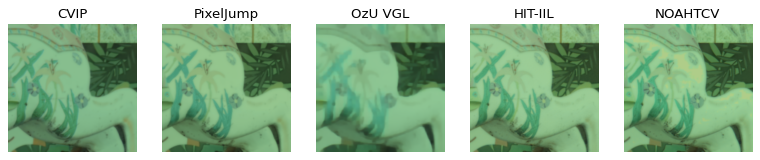

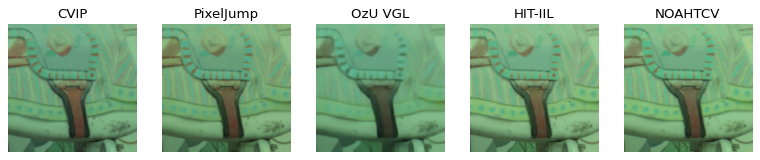

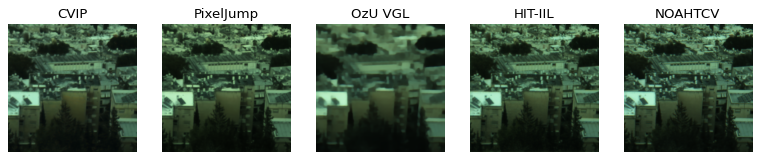

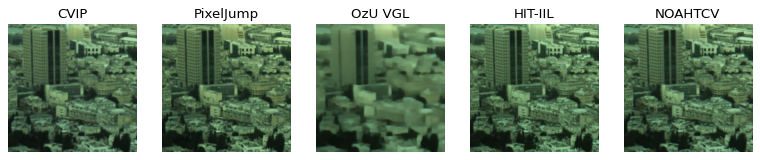

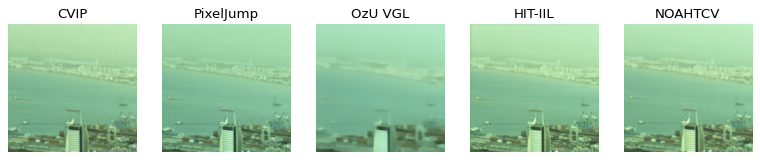

In [7]:
teams = TEAMS[:5]

for sample in track1[:5]:
    
    team_raws = []
    
    for team in teams:
        img_path = os.path.join(team, sample+'.npy')
        raw = load_raw(img_path)
        assert raw.shape[-1] == 4
        raw = postprocess_raw (demosaic(raw))
        assert raw.shape[-1] == 3
        team_raws.append(raw)
        
        ### You can save the <raw> image here
        #save_rgb(raw, path)
        
    team_names = [t.split('/')[-1] for t in teams]
    plot_all(team_raws, titles=team_names, axis='off')

Now let's plot some of the **reconstructed RAWs from 5 teams in Track 2 (Huawei P20)**. Original images form Ignatov et al. [ETH PyNET by Ignatov et al.](http://people.ee.ethz.ch/~ihnatova/pynet.html#dataset)

Note that not all the teams participated in track 2

In [8]:
teams_t2 = [ 'teams/Team-samples/OzU VGL',
             'teams/Team-samples/HIT-IIL',
             'teams/Team-samples/NOAHTCV',
             'teams/Team-samples/HiImage',
             'teams/Team-samples/SenseBrains',
             'teams/Team-samples/0noise',
             'teams/Team-samples/MiAlgo',
             'teams/Team-samples/CASIA LCVG',
           ]

len(teams_t2)

8

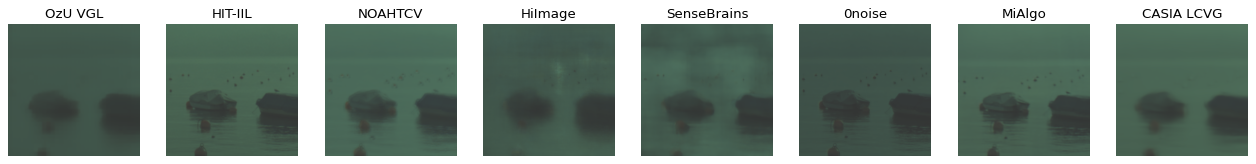

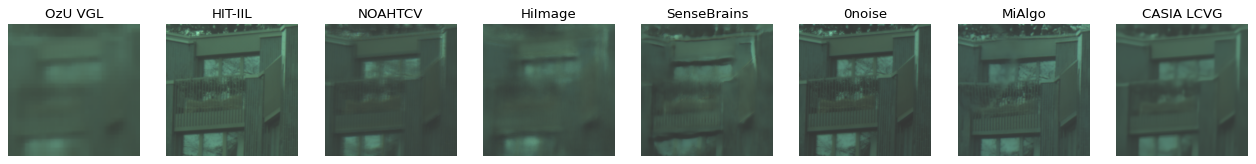

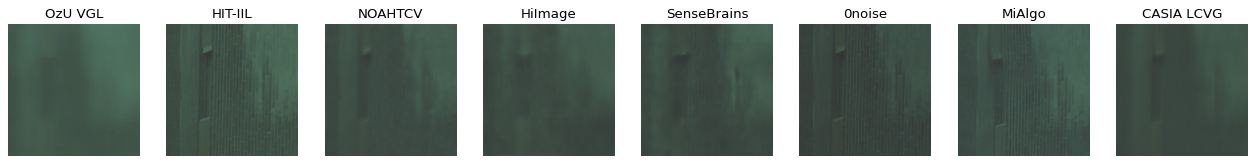

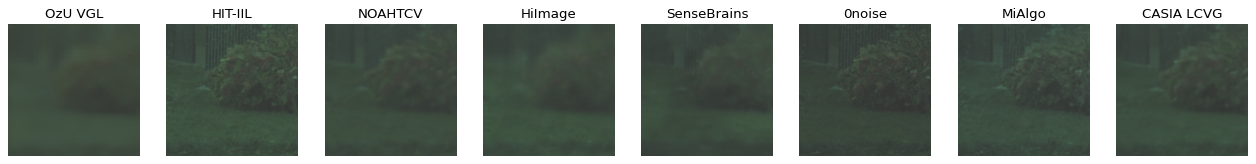

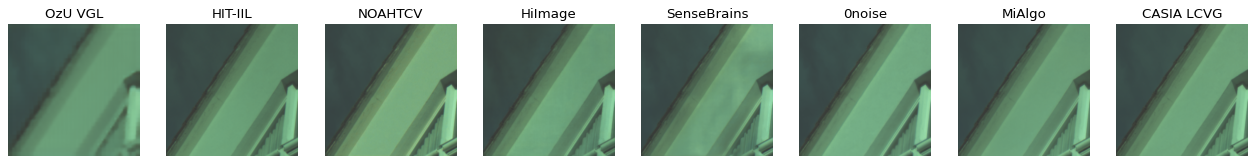

In [9]:
teams = teams_t2
for sample in track2[:5]:
    
    team_raws = []
    
    for team in teams:
        img_path = os.path.join(team, sample+'.npy')
        raw = load_raw(img_path)
        assert raw.shape[-1] == 4
        raw = postprocess_raw (demosaic(raw))
        assert raw.shape[-1] == 3
        team_raws.append(raw)
        
        ### You can save the <raw> image here
        #save_rgb(raw, path)
        
    team_names = [t.split('/')[-1] for t in teams]
    plot_all(team_raws, figsize=(20,10), titles=team_names, axis='off')